### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Dense"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.25
ma1_Shape2 = fn.input()[0] > 0.5
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.25) & (fn.input()[0] <= 0.5)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


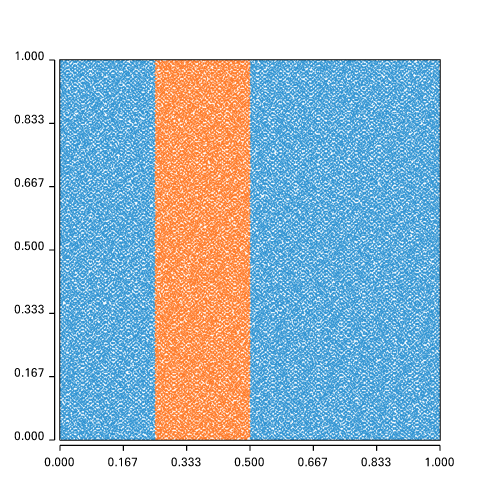

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  1.05


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.init_model()

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1584: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


In [6]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 1.

In [7]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [8]:
GEO.nd(1*u.year)

0.9999999999999999

In [9]:
lamuda = 1
g = 1
rho = 1
eta = 1


t = 4*np.pi*eta/rho/g/lamuda
print(t)

12.566370614359172


In [11]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 150
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002584 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20418e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001301 secs 
  RHS V Solve:            = 0.004434 secs / 7 its
  Pressure Solve:         = 0.105 secs / 28 its
  Final V Solve:          = 0.003448 secs / 7 its

  Total BSSCR Linear solve time: 0.126691 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.275048e-01 (secs)
Time Integration
	2nd order:      

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0962 [min] /    0.0962 [max] (secs)
Time Integration - 0.0963119 [min] / 0.0963119 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 5.741561e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-02 15:28:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002341 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18268e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001308 secs 
  RHS V Solve:            = 0.003647 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002580 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19199e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001282 secs 
  RHS V Solve:            = 0.003633 secs / 7 its
  Pressure Solve:         = 0.09824 secs / 27 its
  Final V Solve:          = 0.003566 secs / 7 its

  Total BSSCR Linear solve time: 0.119496 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.198000e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0827566 [min] / 0.0827566 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.908863e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-02 15:28:44)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002454 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19868e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001292 secs 
  RHS V Solve:            = 0.003627 secs / 7 its
  Pressure Solve:         = 0.1129 secs / 27 its
  Final V Solve:          = 0.003768 secs / 7 its

  Total BSSCR Linear solve time: 0.133935 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.342592e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0828 [min] /    0.0828 [max] (secs)
Time Integration - 0.0828111 [min] / 0.0828111 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.505641e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-02 15:28:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002720 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29588e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.004716 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003095 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48064e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001588 secs 
  RHS V Solve:            = 0.004133 secs / 7 its
  Pressure Solve:         = 0.148 secs / 27 its
  Final V Solve:          = 0.006884 secs / 7 its

  Total BSSCR Linear solve time: 0.177005 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.776957e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0859 [min] /    0.0859 [max] (secs)
Time Integration - 0.0859728 [min] / 0.0859728 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.561306e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    40 Model Time: 4.0 year dt: 36.5 day (2023-06-02 15:29:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003255 seconds

SROpGenerator_SimpleFinestLevel: time = 1.75963e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001886 secs 
  RHS V Solve:            = 0.007163 secs / 7 its
  Pressure Solve:         = 0.1545 secs / 27 its
  Final V Solve:          = 0.003716 secs / 7 its

  Total BSSCR Linear solve time: 0.188302 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.892856e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0812 [min] /    0.0812 [max] (secs)
Time Integration - 0.081195 [min] / 0.081195 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.627422e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    47 Model Time: 4.7 year dt: 36.5 day (2023-06-02 15:29:14)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002680 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32325e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001417 secs 
  RHS V Solve:            = 0.003705 secs /

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003375 seconds

SROpGenerator_SimpleFinestLevel: time = 3.50936e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003789 secs 
  RHS V Solve:            = 0.01104 secs / 7 its
  Pressure Solve:         = 0.1514 secs / 27 its
  Final V Solve:          = 0.003526 secs / 7 its

  Total BSSCR Linear solve time: 0.189657 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.900266e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1024 [min] /    0.1024 [max] (secs)
Time Integration - 0.102394 [min] / 0.102394 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 6.750025e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    60 Model Time: 6.0 year dt: 36.5 day (2023-06-02 15:29:33)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002797 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37757e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.00478 secs / 7 its
  Pressure Solve:         = 0.1166 secs / 27 its
  Final V Solve:          = 0.003828 secs / 7 its

  Total BSSCR Linear solve time: 0.141268 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.416212e-01 (secs)
Time Integration
	2nd order:                 PGWICB

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0850 [min] /    0.0850 [max] (secs)
Time Integration - 0.0850249 [min] / 0.0850249 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.743283e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    67 Model Time: 6.7 year dt: 36.5 day (2023-06-02 15:29:40)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004307 seconds

SROpGenerator_SimpleFinestLevel: time = 2.58600e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00276 secs 
  RHS V Solve:            = 0.006563 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002692 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37361e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001479 secs 
  RHS V Solve:            = 0.004625 secs / 8 its
  Pressure Solve:         = 0.1258 secs / 28 its
  Final V Solve:          = 0.004048 secs / 8 its

  Total BSSCR Linear solve time: 0.149740 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.500828e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0889 [min] /    0.0889 [max] (secs)
Time Integration - 0.0889662 [min] / 0.0889662 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.782781e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    80 Model Time: 8.0 year dt: 36.5 day (2023-06-02 15:29:58)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003736 seconds

SROpGenerator_SimpleFinestLevel: time = 1.88597e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002188 secs 
  RHS V Solve:            = 0.01605 secs / 9 its
  Pressure Solve:         = 0.1638 secs / 28 its
  Final V Solve:          = 0.004361 secs / 8 its

  Total BSSCR Linear solve time: 0.204248 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.047319e-01 (secs)
Time Integration
	2nd order:                 PGWICB

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0867 [min] /    0.0867 [max] (secs)
Time Integration - 0.086695 [min] / 0.086695 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.630555e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:    87 Model Time: 8.7 year dt: 36.5 day (2023-06-02 15:30:05)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002759 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36539e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001479 secs 
  RHS V Solve:            = 0.003733 secs /

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002521 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20579e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001309 secs 
  RHS V Solve:            = 0.003979 secs / 7 its
  Pressure Solve:         = 0.1049 secs / 27 its
  Final V Solve:          = 0.003769 secs / 7 its

  Total BSSCR Linear solve time: 0.126705 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.270451e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0893 [min] /    0.0893 [max] (secs)
Time Integration - 0.0893266 [min] / 0.0893266 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.642818e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   100 Model Time: 10.0 year dt: 36.5 day (2023-06-02 15:30:22)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003174 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34191e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001453 secs 
  RHS V Solve:            = 0.004449 secs / 7 its
  Pressure Solve:         = 0.1367 secs / 27 its
  Final V Solve:          = 0.003972 secs / 7 its

  Total BSSCR Linear solve time: 0.162405 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.629438e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852531 [min] / 0.0852531 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.816635e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   107 Model Time: 10.7 year dt: 36.5 day (2023-06-02 15:30:28)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002719 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31818e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00142 secs 
  RHS V Solve:            = 0.003781 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002748 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36995e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001478 secs 
  RHS V Solve:            = 0.004184 secs / 7 its
  Pressure Solve:         = 0.1074 secs / 27 its
  Final V Solve:          = 0.003993 secs / 7 its

  Total BSSCR Linear solve time: 0.130928 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.312797e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0886 [min] /    0.0886 [max] (secs)
Time Integration - 0.088633 [min] / 0.088633 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.732724e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   120 Model Time: 12.0 year dt: 36.5 day (2023-06-02 15:30:45)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002736 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40914e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001509 secs 
  RHS V Solve:            = 0.003886 secs / 7 its
  Pressure Solve:         = 0.1162 secs / 27 its
  Final V Solve:          = 0.004725 secs / 7 its

  Total BSSCR Linear solve time: 0.140021 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.403945e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1120 [min] /    0.1120 [max] (secs)
Time Integration - 0.112081 [min] / 0.112081 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.729725e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   127 Model Time: 12.7 year dt: 36.5 day (2023-06-02 15:30:52)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002717 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36002e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001459 secs 
  RHS V Solve:            = 0.004088 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002911 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32729e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001444 secs 
  RHS V Solve:            = 0.003838 secs / 7 its
  Pressure Solve:         = 0.1063 secs / 27 its
  Final V Solve:          = 0.003865 secs / 7 its

  Total BSSCR Linear solve time: 0.129175 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.295253e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839861 [min] / 0.0839861 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.641219e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   140 Model Time: 14.0 year dt: 36.5 day (2023-06-02 15:31:09)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002744 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36795e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.004001 secs / 7 its
  Pressure Solve:         = 0.1314 secs / 27 its
  Final V Solve:          = 0.004579 secs / 7 its

  Total BSSCR Linear solve time: 0.155115 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.554537e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.089583 [min] / 0.089583 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.784546e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   147 Model Time: 14.7 year dt: 36.5 day (2023-06-02 15:31:15)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002792 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39079e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.003965 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002723 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46132e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.004035 secs / 7 its
  Pressure Solve:         = 0.1048 secs / 27 its
  Final V Solve:          = 0.003677 secs / 7 its

  Total BSSCR Linear solve time: 0.128105 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.284680e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839619 [min] / 0.0839619 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.841037e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   160 Model Time: 16.0 year dt: 36.5 day (2023-06-02 15:31:32)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002883 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38774e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0015 secs 
  RHS V Solve:            = 0.004061 secs / 7 its
  Pressure Solve:         = 0.121 secs / 27 its
  Final V Solve:          = 0.004532 secs / 7 its

  Total BSSCR Linear solve time: 0.145096 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.454455e-01 (secs)
Time Integration
	2nd order:                 PGWICBR

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0991 [min] /    0.0991 [max] (secs)
Time Integration - 0.0991349 [min] / 0.0991349 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.642805e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   167 Model Time: 16.7 year dt: 36.5 day (2023-06-02 15:31:38)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002853 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37112e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.003818 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002703 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44958e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001551 secs 
  RHS V Solve:            = 0.004137 secs / 7 its
  Pressure Solve:         = 0.1055 secs / 27 its
  Final V Solve:          = 0.003645 secs / 7 its

  Total BSSCR Linear solve time: 0.128712 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.290864e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846815 [min] / 0.0846815 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.841024e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   180 Model Time: 18.0 year dt: 36.5 day (2023-06-02 15:31:55)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002849 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45550e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001561 secs 
  RHS V Solve:            = 0.003977 secs / 7 its
  Pressure Solve:         = 0.125 secs / 27 its
  Final V Solve:          = 0.004415 secs / 7 its

  Total BSSCR Linear solve time: 0.148886 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.492475e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0906 [min] /    0.0906 [max] (secs)
Time Integration - 0.0905988 [min] / 0.0905988 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.027074e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   187 Model Time: 18.7 year dt: 36.5 day (2023-06-02 15:32:02)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002834 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43361e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.003873 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002801 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49730e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001606 secs 
  RHS V Solve:            = 0.003989 secs / 7 its
  Pressure Solve:         = 0.1044 secs / 27 its
  Final V Solve:          = 0.003823 secs / 7 its

  Total BSSCR Linear solve time: 0.127713 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.280945e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902185 [min] / 0.0902185 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.005498e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   200 Model Time: 20.0 year dt: 36.5 day (2023-06-02 15:32:19)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002822 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37981e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001495 secs 
  RHS V Solve:            = 0.00387 secs / 7 its
  Pressure Solve:         = 0.1055 secs / 27 its
  Final V Solve:          = 0.0037 secs / 7 its

  Total BSSCR Linear solve time: 0.128360 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.287471e-01 (secs)
Time Integration
	2nd order:                 PGWICBR

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916455 [min] / 0.0916455 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.831568e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   207 Model Time: 20.7 year dt: 36.5 day (2023-06-02 15:32:25)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002473 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23343e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001355 secs 
  RHS V Solve:            = 0.004721 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002687 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46074e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001558 secs 
  RHS V Solve:            = 0.00383 secs / 7 its
  Pressure Solve:         = 0.1419 secs / 27 its
  Final V Solve:          = 0.003799 secs / 7 its

  Total BSSCR Linear solve time: 0.164733 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.650866e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0866 [min] /    0.0866 [max] (secs)
Time Integration - 0.086681 [min] / 0.086681 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.821715e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   220 Model Time: 22.0 year dt: 36.5 day (2023-06-02 15:32:44)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002617 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29580e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001395 secs 
  RHS V Solve:            = 0.004561 secs / 7 its
  Pressure Solve:         = 0.1063 secs / 27 its
  Final V Solve:          = 0.004416 secs / 8 its

  Total BSSCR Linear solve time: 0.133372 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.337615e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908765 [min] / 0.0908765 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.883623e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   227 Model Time: 22.7 year dt: 36.5 day (2023-06-02 15:32:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002900 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45194e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001559 secs 
  RHS V Solve:            = 0.004042 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002707 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35560e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001477 secs 
  RHS V Solve:            = 0.004072 secs / 7 its
  Pressure Solve:         = 0.1198 secs / 27 its
  Final V Solve:          = 0.0043 secs / 8 its

  Total BSSCR Linear solve time: 0.143485 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.438965e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928685 [min] / 0.0928685 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.920428e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   240 Model Time: 24.0 year dt: 36.5 day (2023-06-02 15:33:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002905 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43871e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001544 secs 
  RHS V Solve:            = 0.004042 secs / 7 its
  Pressure Solve:         = 0.1085 secs / 27 its
  Final V Solve:          = 0.004332 secs / 8 its

  Total BSSCR Linear solve time: 0.132751 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.331138e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929268 [min] / 0.0929268 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.848024e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   247 Model Time: 24.7 year dt: 36.5 day (2023-06-02 15:33:14)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002868 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38432e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.004302 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002828 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42026e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.00488 secs / 8 its
  Pressure Solve:         = 0.1285 secs / 28 its
  Final V Solve:          = 0.005194 secs / 8 its

  Total BSSCR Linear solve time: 0.155409 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.557762e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0876 [min] /    0.0876 [max] (secs)
Time Integration - 0.0876042 [min] / 0.0876042 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.340599e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   260 Model Time: 26.0 year dt: 36.5 day (2023-06-02 15:33:32)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002813 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47202e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.004925 secs / 8 its
  Pressure Solve:         = 0.1235 secs / 28 its
  Final V Solve:          = 0.004758 secs / 8 its

  Total BSSCR Linear solve time: 0.149070 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.495630e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917806 [min] / 0.0917806 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.860120e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   267 Model Time: 26.7 year dt: 36.5 day (2023-06-02 15:33:38)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003207 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43393e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.004695 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002820 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41099e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.004472 secs / 8 its
  Pressure Solve:         = 0.1326 secs / 28 its
  Final V Solve:          = 0.005568 secs / 8 its

  Total BSSCR Linear solve time: 0.158209 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.586155e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.0915717 [min] / 0.0915717 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.806426e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   280 Model Time: 28.0 year dt: 36.5 day (2023-06-02 15:33:55)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002871 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43369e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.004614 secs / 8 its
  Pressure Solve:         = 0.1174 secs / 28 its
  Final V Solve:          = 0.005182 secs / 8 its

  Total BSSCR Linear solve time: 0.143032 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.434324e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929132 [min] / 0.0929132 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.912047e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   287 Model Time: 28.7 year dt: 36.5 day (2023-06-02 15:34:02)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002835 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42617e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.004551 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002809 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41588e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.004574 secs / 8 its
  Pressure Solve:         = 0.133 secs / 28 its
  Final V Solve:          = 0.00528 secs / 8 its

  Total BSSCR Linear solve time: 0.158540 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.589188e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0906 [min] /    0.0906 [max] (secs)
Time Integration - 0.090608 [min] / 0.090608 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.885299e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   300 Model Time: 30.0 year dt: 36.5 day (2023-06-02 15:34:20)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002918 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47713e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.004605 secs / 8 its
  Pressure Solve:         = 0.1121 secs / 28 its
  Final V Solve:          = 0.004295 secs / 8 its

  Total BSSCR Linear solve time: 0.136955 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.373643e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920343 [min] / 0.0920343 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.930903e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   307 Model Time: 30.7 year dt: 36.5 day (2023-06-02 15:34:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002705 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41844e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.004567 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002677 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32483e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001426 secs 
  RHS V Solve:            = 0.004591 secs / 8 its
  Pressure Solve:         = 0.1095 secs / 28 its
  Final V Solve:          = 0.004348 secs / 8 its

  Total BSSCR Linear solve time: 0.133575 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.340123e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0900 [min] /    0.0900 [max] (secs)
Time Integration - 0.0900197 [min] / 0.0900197 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.028062e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   320 Model Time: 32.0 year dt: 36.5 day (2023-06-02 15:34:43)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002985 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46335e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.004766 secs / 8 its
  Pressure Solve:         = 0.1109 secs / 28 its
  Final V Solve:          = 0.004246 secs / 8 its

  Total BSSCR Linear solve time: 0.136534 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.369175e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903436 [min] / 0.0903436 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.840917e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   327 Model Time: 32.7 year dt: 36.5 day (2023-06-02 15:34:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002866 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42534e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001528 secs 
  RHS V Solve:            = 0.007102 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002681 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43455e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001546 secs 
  RHS V Solve:            = 0.004508 secs / 8 its
  Pressure Solve:         = 0.1098 secs / 28 its
  Final V Solve:          = 0.009538 secs / 8 its

  Total BSSCR Linear solve time: 0.138906 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.393991e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1215 [min] /    0.1215 [max] (secs)
Time Integration - 0.121569 [min] / 0.121569 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.783636e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   340 Model Time: 34.0 year dt: 36.5 day (2023-06-02 15:35:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002841 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39563e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.004624 secs / 8 its
  Pressure Solve:         = 0.1241 secs / 28 its
  Final V Solve:          = 0.005394 secs / 8 its

  Total BSSCR Linear solve time: 0.149767 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.501663e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1012 [min] /    0.1012 [max] (secs)
Time Integration - 0.101271 [min] / 0.101271 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.925882e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   347 Model Time: 34.7 year dt: 36.5 day (2023-06-02 15:35:14)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002916 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45672e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001561 secs 
  RHS V Solve:            = 0.004542 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002703 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35273e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001458 secs 
  RHS V Solve:            = 0.004909 secs / 8 its
  Pressure Solve:         = 0.1365 secs / 28 its
  Final V Solve:          = 0.005223 secs / 8 its

  Total BSSCR Linear solve time: 0.161770 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.622181e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912241 [min] / 0.0912241 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.084400e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   360 Model Time: 36.0 year dt: 36.5 day (2023-06-02 15:35:32)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002783 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36668e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.004652 secs / 8 its
  Pressure Solve:         = 0.1115 secs / 28 its
  Final V Solve:          = 0.004528 secs / 8 its

  Total BSSCR Linear solve time: 0.136135 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.366037e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1007 [min] /    0.1007 [max] (secs)
Time Integration - 0.100767 [min] / 0.100767 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.242759e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   367 Model Time: 36.7 year dt: 36.5 day (2023-06-02 15:35:38)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002818 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44717e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001552 secs 
  RHS V Solve:            = 0.004527 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002693 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33861e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001446 secs 
  RHS V Solve:            = 0.004662 secs / 8 its
  Pressure Solve:         = 0.1125 secs / 28 its
  Final V Solve:          = 0.004451 secs / 8 its

  Total BSSCR Linear solve time: 0.136936 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.373650e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918686 [min] / 0.0918686 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.919317e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   380 Model Time: 38.0 year dt: 36.5 day (2023-06-02 15:35:56)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003008 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51955e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001645 secs 
  RHS V Solve:            = 0.004219 secs / 8 its
  Pressure Solve:         = 0.1624 secs / 28 its
  Final V Solve:          = 0.00463 secs / 8 its

  Total BSSCR Linear solve time: 0.194219 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.948135e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1062 [min] /    0.1062 [max] (secs)
Time Integration - 0.106273 [min] / 0.106273 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.264737e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   387 Model Time: 38.7 year dt: 36.5 day (2023-06-02 15:36:02)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002796 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40264e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.004504 secs /

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002825 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43639e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.004855 secs / 8 its
  Pressure Solve:         = 0.1159 secs / 28 its
  Final V Solve:          = 0.004668 secs / 8 its

  Total BSSCR Linear solve time: 0.141275 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.417191e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0921 [min] /    0.0921 [max] (secs)
Time Integration - 0.0921934 [min] / 0.0921934 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.140614e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   400 Model Time: 40.0 year dt: 36.5 day (2023-06-02 15:36:20)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002876 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42091e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.005522 secs / 8 its
  Pressure Solve:         = 0.1324 secs / 28 its
  Final V Solve:          = 0.004652 secs / 8 its

  Total BSSCR Linear solve time: 0.159031 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.594894e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0965 [min] /    0.0965 [max] (secs)
Time Integration - 0.0965178 [min] / 0.0965178 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.141436e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   407 Model Time: 40.7 year dt: 36.5 day (2023-06-02 15:36:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002967 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45871e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001562 secs 
  RHS V Solve:            = 0.004515 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002831 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46789e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001629 secs 
  RHS V Solve:            = 0.004631 secs / 8 its
  Pressure Solve:         = 0.1123 secs / 28 its
  Final V Solve:          = 0.004579 secs / 8 its

  Total BSSCR Linear solve time: 0.137357 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.377686e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936062 [min] / 0.0936062 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.938365e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   420 Model Time: 42.0 year dt: 36.5 day (2023-06-02 15:36:44)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003059 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43947e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00155 secs 
  RHS V Solve:            = 0.004785 secs / 8 its
  Pressure Solve:         = 0.1131 secs / 28 its
  Final V Solve:          = 0.004203 secs / 8 its

  Total BSSCR Linear solve time: 0.138221 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.386652e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0893 [min] /    0.0893 [max] (secs)
Time Integration - 0.0892946 [min] / 0.0892946 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.946304e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   427 Model Time: 42.7 year dt: 36.5 day (2023-06-02 15:36:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003070 seconds

SROpGenerator_SimpleFinestLevel: time = 2.13730e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002263 secs 
  RHS V Solve:            = 0.008352 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002825 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41708e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.004444 secs / 8 its
  Pressure Solve:         = 0.1297 secs / 28 its
  Final V Solve:          = 0.004613 secs / 8 its

  Total BSSCR Linear solve time: 0.154494 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.549400e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0883 [min] /    0.0883 [max] (secs)
Time Integration - 0.0883674 [min] / 0.0883674 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.972905e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   440 Model Time: 44.0 year dt: 36.5 day (2023-06-02 15:37:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002864 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46940e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.00445 secs / 8 its
  Pressure Solve:         = 0.1115 secs / 28 its
  Final V Solve:          = 0.004383 secs / 8 its

  Total BSSCR Linear solve time: 0.136012 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.364728e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0993 [min] /    0.0993 [max] (secs)
Time Integration - 0.0993423 [min] / 0.0993423 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.069334e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   447 Model Time: 44.7 year dt: 36.5 day (2023-06-02 15:37:14)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002618 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30169e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.004614 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002804 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47305e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.00439 secs / 8 its
  Pressure Solve:         = 0.1234 secs / 28 its
  Final V Solve:          = 0.005268 secs / 8 its

  Total BSSCR Linear solve time: 0.148620 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.490808e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0970 [min] /    0.0970 [max] (secs)
Time Integration - 0.0970162 [min] / 0.0970162 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.767442e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   460 Model Time: 46.0 year dt: 36.5 day (2023-06-02 15:37:31)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003047 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45820e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.00444 secs / 8 its
  Pressure Solve:         = 0.1091 secs 

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920405 [min] / 0.0920405 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.132841e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   467 Model Time: 46.7 year dt: 36.5 day (2023-06-02 15:37:38)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002827 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41599e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.004982 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002900 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42413e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.005753 secs / 8 its
  Pressure Solve:         = 0.1154 secs / 28 its
  Final V Solve:          = 0.004353 secs / 8 its

  Total BSSCR Linear solve time: 0.142170 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.426518e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.0935655 [min] / 0.0935655 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.010078e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   480 Model Time: 48.0 year dt: 36.5 day (2023-06-02 15:37:55)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002848 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47919e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001588 secs 
  RHS V Solve:            = 0.005023 secs / 8 its
  Pressure Solve:         = 0.1128 secs / 28 its
  Final V Solve:          = 0.004282 secs / 8 its

  Total BSSCR Linear solve time: 0.137820 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.382493e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930766 [min] / 0.0930766 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.017827e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   487 Model Time: 48.7 year dt: 36.5 day (2023-06-02 15:38:01)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003905 seconds

SROpGenerator_SimpleFinestLevel: time = 2.51860e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002689 secs 
  RHS V Solve:            = 0.008107 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002910 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46582e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00159 secs 
  RHS V Solve:            = 0.00494 secs / 8 its
  Pressure Solve:         = 0.1307 secs / 28 its
  Final V Solve:          = 0.004635 secs / 8 its

  Total BSSCR Linear solve time: 0.156473 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.569088e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0944291 [min] / 0.0944291 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.076008e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   500 Model Time: 50.0 year dt: 36.5 day (2023-06-02 15:38:19)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002901 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40095e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.004422 secs / 8 its
  Pressure Solve:         = 0.113 secs / 28 its
  Final V Solve:          = 0.004517 secs / 8 its

  Total BSSCR Linear solve time: 0.137206 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.376871e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943359 [min] / 0.0943359 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.247097e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   507 Model Time: 50.7 year dt: 36.5 day (2023-06-02 15:38:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002857 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47220e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001588 secs 
  RHS V Solve:            = 0.005376 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002724 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37701e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00148 secs 
  RHS V Solve:            = 0.004178 secs / 8 its
  Pressure Solve:         = 0.1354 secs / 28 its
  Final V Solve:          = 0.005333 secs / 8 its

  Total BSSCR Linear solve time: 0.159904 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.603310e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0960 [min] /    0.0960 [max] (secs)
Time Integration - 0.09605 [min] / 0.09605 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.218677e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	don

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   520 Model Time: 52.0 year dt: 36.5 day (2023-06-02 15:38:43)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002824 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40877e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.00445 secs / 8 its
  Pressure Solve:         = 0.1234 secs / 28 its
  Final V Solve:          = 0.00541 secs / 8 its

  Total BSSCR Linear solve time: 0.148966 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.494029e-01 (secs)
Time Integration
	2nd order:                 PGWICB

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0949 [min] /    0.0949 [max] (secs)
Time Integration - 0.0949645 [min] / 0.0949645 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.219871e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   527 Model Time: 52.7 year dt: 36.5 day (2023-06-02 15:38:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002855 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43007e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.004494 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004965 seconds

SROpGenerator_SimpleFinestLevel: time = 2.52442e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002695 secs 
  RHS V Solve:            = 0.01197 secs / 8 its
  Pressure Solve:         = 0.1466 secs / 28 its
  Final V Solve:          = 0.004651 secs / 8 its

  Total BSSCR Linear solve time: 0.187851 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.883661e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0878 [min] /    0.0878 [max] (secs)
Time Integration - 0.0878681 [min] / 0.0878681 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.970230e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   540 Model Time: 54.0 year dt: 36.5 day (2023-06-02 15:39:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52289e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001634 secs 
  RHS V Solve:            = 0.004398 secs / 8 its
  Pressure Solve:         = 0.1334 secs / 28 its
  Final V Solve:          = 0.005213 secs / 8 its

  Total B

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0944581 [min] / 0.0944581 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.834505e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   547 Model Time: 54.7 year dt: 36.5 day (2023-06-02 15:39:14)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002847 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42837e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001564 secs 
  RHS V Solve:            = 0.005896 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002956 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41981e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.005831 secs / 8 its
  Pressure Solve:         = 0.1409 secs / 28 its
  Final V Solve:          = 0.005513 secs / 8 its

  Total BSSCR Linear solve time: 0.169114 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.696218e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917676 [min] / 0.0917676 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.023713e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   560 Model Time: 56.0 year dt: 36.5 day (2023-06-02 15:39:32)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002847 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38478e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001492 secs 
  RHS V Solve:            = 0.004805 secs / 8 its
  Pressure Solve:         = 0.1247 secs / 28 its
  Final V Solve:          = 0.00448 secs / 8 its

  Total BS

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918774 [min] / 0.0918774 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.104730e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   567 Model Time: 56.7 year dt: 36.5 day (2023-06-02 15:39:39)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002755 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39132e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0015 secs 
  RHS V Solve:            = 0.004645 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002834 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48397e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.004364 secs / 8 its
  Pressure Solve:         = 0.1126 secs / 28 its
  Final V Solve:          = 0.004402 secs / 8 its

  Total BSSCR Linear solve time: 0.136954 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.373959e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917262 [min] / 0.0917262 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.846454e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   580 Model Time: 58.0 year dt: 36.5 day (2023-06-02 15:39:57)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002908 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52819e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001646 secs 
  RHS V Solve:            = 0.006632 secs / 9 its
  Pressure Solve:         = 0.1658 secs / 30 its
  Final V Solve:          = 0.005986 secs / 9 its

  Total BSSCR Linear solve time: 0.195247 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.957404e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1013 [min] /    0.1013 [max] (secs)
Time Integration - 0.101389 [min] / 0.101389 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.442104e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   587 Model Time: 58.7 year dt: 36.5 day (2023-06-02 15:40:04)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002878 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50191e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001607 secs 
  RHS V Solve:            = 0.005213 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002930 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41194e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001522 secs 
  RHS V Solve:            = 0.004483 secs / 8 its
  Pressure Solve:         = 0.1155 secs / 29 its
  Final V Solve:          = 0.004369 secs / 8 its

  Total BSSCR Linear solve time: 0.140110 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.405439e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980722 [min] / 0.0980722 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.358744e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   600 Model Time: 60.0 year dt: 36.5 day (2023-06-02 15:40:22)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004889 seconds

SROpGenerator_SimpleFinestLevel: time = 2.45595e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002636 secs 
  RHS V Solve:            = 0.008217 secs / 8 its
  Pressure Solve:         = 0.2475 secs / 29 its
  Final V Solve:          = 0.007919 secs / 8 its

  Total BSSCR Linear solve time: 0.289881 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.905821e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1014 [min] /    0.1014 [max] (secs)
Time Integration - 0.101444 [min] / 0.101444 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.188945e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   607 Model Time: 60.7 year dt: 36.5 day (2023-06-02 15:40:29)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005572 seconds

SROpGenerator_SimpleFinestLevel: time = 3.05682e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003219 secs 
  RHS V Solve:            = 0.005151 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005079 seconds

SROpGenerator_SimpleFinestLevel: time = 2.84839e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003015 secs 
  RHS V Solve:            = 0.00804 secs / 9 its
  Pressure Solve:         = 0.1412 secs / 29 its
  Final V Solve:          = 0.004983 secs / 9 its

  Total BSSCR Linear solve time: 0.180628 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.812663e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.095134 [min] / 0.095134 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.071615e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	d

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   620 Model Time: 62.0 year dt: 36.5 day (2023-06-02 15:40:47)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002883 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44599e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001571 secs 
  RHS V Solve:            = 0.006606 secs / 9 its
  Pressure Solve:         = 0.1465 secs / 29 its
  Final V Solve:          = 0.005226 secs / 9 its

  Total B

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0997 [min] /    0.0997 [max] (secs)
Time Integration - 0.0997035 [min] / 0.0997035 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.221178e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   627 Model Time: 62.7 year dt: 36.5 day (2023-06-02 15:40:54)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002935 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44412e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001575 secs 
  RHS V Solve:            = 0.005612 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002733 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44486e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001562 secs 
  RHS V Solve:            = 0.004578 secs / 8 its
  Pressure Solve:         = 0.1173 secs / 29 its
  Final V Solve:          = 0.004433 secs / 8 its

  Total BSSCR Linear solve time: 0.142318 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.428241e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0925 [min] /    0.0925 [max] (secs)
Time Integration - 0.0925214 [min] / 0.0925214 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.273344e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   640 Model Time: 64.0 year dt: 36.5 day (2023-06-02 15:41:12)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002664 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32929e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001455 secs 
  RHS V Solve:            = 0.004768 secs / 8 its
  Pressure Solve:         = 0.1126 secs / 28 its
  Final V Solve:          = 0.004484 secs / 8 its

  Total BSSCR Linear solve time: 0.137191 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.376678e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1055 [min] /    0.1055 [max] (secs)
Time Integration - 0.105503 [min] / 0.105503 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.214696e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   647 Model Time: 64.7 year dt: 36.5 day (2023-06-02 15:41:18)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.0058 secs / 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002877 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42777e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001537 secs 
  RHS V Solve:            = 0.005341 secs / 8 its
  Pressure Solve:         = 0.1324 secs / 28 its
  Final V Solve:          = 0.005163 secs / 8 its

  Total BSSCR Linear solve time: 0.159354 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.598446e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.0953855 [min] / 0.0953855 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.162785e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   660 Model Time: 66.0 year dt: 36.5 day (2023-06-02 15:41:36)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002909 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44263e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001563 secs 
  RHS V Solve:            = 0.004903 secs / 8 its
  Pressure Solve:         = 0.1389 secs / 29 its
  Final V Solve:          = 0.004715 secs / 8 its

  Total B

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1055 [min] /    0.1055 [max] (secs)
Time Integration - 0.105559 [min] / 0.105559 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.205520e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   667 Model Time: 66.7 year dt: 36.5 day (2023-06-02 15:41:43)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003357 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39850e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001531 secs 
  RHS V Solve:            = 0.007475 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002733 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33677e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001451 secs 
  RHS V Solve:            = 0.004519 secs / 8 its
  Pressure Solve:         = 0.1274 secs / 29 its
  Final V Solve:          = 0.00468 secs / 8 its

  Total BSSCR Linear solve time: 0.151631 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.521492e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0956 [min] /    0.0956 [max] (secs)
Time Integration - 0.0956785 [min] / 0.0956785 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.171608e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   680 Model Time: 68.0 year dt: 36.5 day (2023-06-02 15:42:01)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004805 seconds

SROpGenerator_SimpleFinestLevel: time = 2.59386e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002778 secs 
  RHS V Solve:            = 0.004879 secs / 8 its
  Pressure Solve:         = 0.1224 secs / 29 its
  Final V Solve:          = 0.004411 secs / 8 its

  Total BSSCR Linear solve time: 0.157709 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.584574e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0966 [min] /    0.0966 [max] (secs)
Time Integration - 0.0966373 [min] / 0.0966373 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.111756e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   687 Model Time: 68.7 year dt: 36.5 day (2023-06-02 15:42:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002940 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50099e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001628 secs 
  RHS V Solve:            = 0.004778 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003051 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42429e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001529 secs 
  RHS V Solve:            = 0.00455 secs / 8 its
  Pressure Solve:         = 0.1339 secs / 29 its
  Final V Solve:          = 0.004338 secs / 8 its

  Total BSSCR Linear solve time: 0.158809 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.592819e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0981 [min] /    0.0981 [max] (secs)
Time Integration - 0.0981855 [min] / 0.0981855 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.072039e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   700 Model Time: 70.0 year dt: 36.5 day (2023-06-02 15:42:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002912 seconds

SROpGenerator_SimpleFinestLevel: time = 1.55030e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001707 secs 
  RHS V Solve:            = 0.005494 secs / 8 its
  Pressure Solve:         = 0.1552 secs / 29 its
  Final V Solve:          = 0.00949 secs / 8 its

  Total BSSCR Linear solve time: 0.187417 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.879639e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0931 [min] /    0.0931 [max] (secs)
Time Integration - 0.0931112 [min] / 0.0931112 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.148039e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   707 Model Time: 70.7 year dt: 36.5 day (2023-06-02 15:42:33)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002887 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47806e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001602 secs 
  RHS V Solve:            = 0.00481 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002932 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46485e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001578 secs 
  RHS V Solve:            = 0.004521 secs / 8 its
  Pressure Solve:         = 0.1218 secs / 29 its
  Final V Solve:          = 0.006559 secs / 8 its

  Total BSSCR Linear solve time: 0.149425 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.499883e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0934252 [min] / 0.0934252 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.254944e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   720 Model Time: 72.0 year dt: 36.5 day (2023-06-02 15:42:51)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002762 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36635e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001477 secs 
  RHS V Solve:            = 0.004833 secs / 8 its
  Pressure Solve:         = 0.1357 secs / 29 its
  Final V Solve:          = 0.004442 secs / 8 its

  Total B

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1039 [min] /    0.1039 [max] (secs)
Time Integration - 0.103949 [min] / 0.103949 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.975661e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   727 Model Time: 72.7 year dt: 36.5 day (2023-06-02 15:42:57)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002910 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47439e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001606 secs 
  RHS V Solve:            = 0.005582 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002682 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35672e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001461 secs 
  RHS V Solve:            = 0.004778 secs / 8 its
  Pressure Solve:         = 0.1239 secs / 29 its
  Final V Solve:          = 0.004466 secs / 8 its

  Total BSSCR Linear solve time: 0.148345 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.488601e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0934291 [min] / 0.0934291 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.955805e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   740 Model Time: 74.0 year dt: 36.5 day (2023-06-02 15:43:15)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41029e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.00581 secs / 8 its
  Pressure Solve:         = 0.1504 secs / 29 its
  Final V Solve:          = 0.005413 secs / 8 its

  Total BS

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932572 [min] / 0.0932572 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.258584e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   747 Model Time: 74.7 year dt: 36.5 day (2023-06-02 15:43:22)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002689 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35154e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00147 secs 
  RHS V Solve:            = 0.004654 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002836 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43676e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.004578 secs / 8 its
  Pressure Solve:         = 0.1183 secs / 29 its
  Final V Solve:          = 0.004384 secs / 8 its

  Total BSSCR Linear solve time: 0.142790 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.433095e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1058 [min] /    0.1058 [max] (secs)
Time Integration - 0.105894 [min] / 0.105894 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.674566e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   760 Model Time: 76.0 year dt: 36.5 day (2023-06-02 15:43:40)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002833 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45566e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00156 secs 
  RHS V Solve:            = 0.004462 secs / 8 its
  Pressure Solve:         = 0.1191 secs / 29 its
  Final V Solve:          = 0.004233 secs / 8 its

  Total BSSCR Linear solve time: 0.143434 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.439136e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0899 [min] /    0.0899 [max] (secs)
Time Integration - 0.0899096 [min] / 0.0899096 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.021305e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   767 Model Time: 76.7 year dt: 36.5 day (2023-06-02 15:43:46)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002853 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46720e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001609 secs 
  RHS V Solve:            = 0.004487 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002900 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40328e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001513 secs 
  RHS V Solve:            = 0.004713 secs / 8 its
  Pressure Solve:         = 0.1459 secs / 29 its
  Final V Solve:          = 0.005371 secs / 8 its

  Total BSSCR Linear solve time: 0.172305 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.728114e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1063 [min] /    0.1063 [max] (secs)
Time Integration - 0.10635 [min] / 0.10635 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.184724e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   780 Model Time: 78.0 year dt: 36.5 day (2023-06-02 15:44:05)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48662e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001618 secs 
  RHS V Solve:            = 0.004883 secs / 8 its
  Pressure Solve:         = 0.1263 secs / 29 its
  Final V Solve:          = 0.004216 secs / 8 its

  Total BSSCR Linear solve time: 0.151867 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.524028e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0983 [min] /    0.0983 [max] (secs)
Time Integration - 0.0983422 [min] / 0.0983422 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.184479e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   787 Model Time: 78.7 year dt: 36.5 day (2023-06-02 15:44:12)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003015 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40676e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.004514 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.86740e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001999 secs 
  RHS V Solve:            = 0.008907 secs / 8 its
  Pressure Solve:         = 0.1473 secs / 29 its
  Final V Solve:          = 0.004274 secs / 8 its

  Total BSSCR Linear solve time: 0.183282 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.837845e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895343 [min] / 0.0895343 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.798514e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   800 Model Time: 80.0 year dt: 36.5 day (2023-06-02 15:44:30)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002874 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48088e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001606 secs 
  RHS V Solve:            = 0.005775 secs / 8 its
  Pressure Solve:         = 0.1645 secs / 29 its
  Final V Solve:          = 0.006469 secs / 8 its

  Total BSSCR Linear solve time: 0.193675 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.942425e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1015 [min] /    0.1015 [max] (secs)
Time Integration - 0.101551 [min] / 0.101551 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.216918e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   807 Model Time: 80.7 year dt: 36.5 day (2023-06-02 15:44:36)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002737 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36959e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001475 secs 
  RHS V Solve:            = 0.004349 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002850 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50629e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001618 secs 
  RHS V Solve:            = 0.005633 secs / 8 its
  Pressure Solve:         = 0.1451 secs / 29 its
  Final V Solve:          = 0.005409 secs / 8 its

  Total BSSCR Linear solve time: 0.172808 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.733573e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0905 [min] /    0.0905 [max] (secs)
Time Integration - 0.0905179 [min] / 0.0905179 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.105733e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   820 Model Time: 82.0 year dt: 36.5 day (2023-06-02 15:44:54)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002753 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33172e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001463 secs 
  RHS V Solve:            = 0.004651 secs / 8 its
  Pressure Solve:         = 0.119 secs 

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0892 [min] /    0.0892 [max] (secs)
Time Integration - 0.0892188 [min] / 0.0892188 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.086893e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   827 Model Time: 82.7 year dt: 36.5 day (2023-06-02 15:45:01)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002858 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42211e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.004759 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44164e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001553 secs 
  RHS V Solve:            = 0.00597 secs / 8 its
  Pressure Solve:         = 0.1471 secs / 29 its
  Final V Solve:          = 0.00445 secs / 8 its

  Total BSSCR Linear solve time: 0.174276 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.748392e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0993 [min] /    0.0993 [max] (secs)
Time Integration - 0.0993844 [min] / 0.0993844 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.944765e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   840 Model Time: 84.0 year dt: 36.5 day (2023-06-02 15:45:19)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002954 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43595e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.004939 secs / 8 its
  Pressure Solve:         = 0.1321 secs / 29 its
  Final V Solve:          = 0.004708 secs / 8 its

  Total B

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0999 [min] /    0.0999 [max] (secs)
Time Integration - 0.099984 [min] / 0.099984 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.873252e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   847 Model Time: 84.7 year dt: 36.5 day (2023-06-02 15:45:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002897 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41656e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001518 secs 
  RHS V Solve:            = 0.004522 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002730 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42582e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001545 secs 
  RHS V Solve:            = 0.005919 secs / 10 its
  Pressure Solve:         = 0.1656 secs / 30 its
  Final V Solve:          = 0.005702 secs / 10 its

  Total BSSCR Linear solve time: 0.192714 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.932393e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0964144 [min] / 0.0964144 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.325852e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swar

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   860 Model Time: 86.0 year dt: 36.5 day (2023-06-02 15:45:45)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002850 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47222e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001581 secs 
  RHS V Solve:            = 0.005594 secs / 10 its
  Pressure Solve:         = 0.1976 secs / 30 its
  Final V Solve:          = 0.006258 secs / 10 its

  Total

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938718 [min] / 0.0938718 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.179296e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   867 Model Time: 86.7 year dt: 36.5 day (2023-06-02 15:45:52)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002847 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43111e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001551 secs 
  RHS V Solve:            = 0.005635 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003056 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48492e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001597 secs 
  RHS V Solve:            = 0.005656 secs / 10 its
  Pressure Solve:         = 0.1622 secs / 30 its
  Final V Solve:          = 0.005306 secs / 10 its

  Total BSSCR Linear solve time: 0.189231 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.897647e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0965003 [min] / 0.0965003 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.246316e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swar

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   880 Model Time: 88.0 year dt: 36.5 day (2023-06-02 15:46:11)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002932 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44446e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001551 secs 
  RHS V Solve:            = 0.005616 secs / 10 its
  Pressure Solve:         = 0.1896 secs / 30 its
  Final V Solve:          = 0.005855 secs / 10 its

  Total

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0987 [min] /    0.0987 [max] (secs)
Time Integration - 0.0987418 [min] / 0.0987418 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.347478e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   887 Model Time: 88.7 year dt: 36.5 day (2023-06-02 15:46:18)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002929 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50876e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001621 secs 
  RHS V Solve:            = 0.006848 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002813 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40759e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001533 secs 
  RHS V Solve:            = 0.00674 secs / 12 its
  Pressure Solve:         = 0.227 secs / 32 its
  Final V Solve:          = 0.006257 secs / 11 its

  Total BSSCR Linear solve time: 0.255571 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.560849e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0930085 [min] / 0.0930085 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.140724e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   900 Model Time: 90.0 year dt: 36.5 day (2023-06-02 15:46:38)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002910 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46826e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001585 secs 
  RHS V Solve:            = 0.00705 secs / 12 its
  Pressure Solve:         = 0.2176 secs / 32 its
  Final V Solve:          = 0.008799 secs / 11 its

  Total BSSCR Linear solve time: 0.250502 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.513943e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0898 [min] /    0.0898 [max] (secs)
Time Integration - 0.0898649 [min] / 0.0898649 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.202251e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   907 Model Time: 90.7 year dt: 36.5 day (2023-06-02 15:46:45)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002831 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42272e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001548 secs 
  RHS V Solve:            = 0.006571 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002887 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45824e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001577 secs 
  RHS V Solve:            = 0.007265 secs / 12 its
  Pressure Solve:         = 0.2179 secs / 32 its
  Final V Solve:          = 0.006374 secs / 11 its

  Total BSSCR Linear solve time: 0.248025 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.485934e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0940095 [min] / 0.0940095 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.204093e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swar

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   920 Model Time: 92.0 year dt: 36.5 day (2023-06-02 15:47:05)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003573 seconds

SROpGenerator_SimpleFinestLevel: time = 1.66637e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001832 secs 
  RHS V Solve:            = 0.007023 secs / 12 its
  Pressure Solve:         = 0.2372 secs / 32 its
  Final V Solve:          = 0.00705 secs / 11 its

  Total 

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.096411 [min] / 0.096411 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.181585e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   927 Model Time: 92.7 year dt: 36.5 day (2023-06-02 15:47:12)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002983 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41546e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001529 secs 
  RHS V Solve:            = 0.008865 secs 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002866 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44863e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.00721 secs / 12 its
  Pressure Solve:         = 0.2311 secs / 32 its
  Final V Solve:          = 0.006441 secs / 11 its

  Total BSSCR Linear solve time: 0.261012 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.615583e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.095322 [min] / 0.095322 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.160241e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   940 Model Time: 94.0 year dt: 36.5 day (2023-06-02 15:47:31)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002901 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46125e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00157 secs 
  RHS V Solve:            = 0.01407 secs / 12 its
  Pressure Solve:         = 0.242 secs / 32 its
  Final V Solve:          = 0.007597 secs / 11 its

  Total BS

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0944301 [min] / 0.0944301 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.175571e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   947 Model Time: 94.7 year dt: 36.5 day (2023-06-02 15:47:39)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002914 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45705e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001605 secs 
  RHS V Solve:            = 0.008656 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002709 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39318e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.006996 secs / 12 its
  Pressure Solve:         = 0.2229 secs / 32 its
  Final V Solve:          = 0.006178 secs / 11 its

  Total BSSCR Linear solve time: 0.251295 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.518341e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0944098 [min] / 0.0944098 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.043435e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swar

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   960 Model Time: 96.0 year dt: 36.5 day (2023-06-02 15:47:59)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002891 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41487e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001534 secs 
  RHS V Solve:            = 0.006624 secs / 12 its
  Pressure Solve:         = 0.2579 secs / 32 its
  Final V Solve:          = 0.01259 secs / 11 its

  Total BSSCR Linear solve time: 0.293178 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.937695e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0957 [min] /    0.0957 [max] (secs)
Time Integration - 0.095692 [min] / 0.095692 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.084084e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   967 Model Time: 96.7 year dt: 36.5 day (2023-06-02 15:48:06)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002968 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49030e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001626 secs 
  RHS V Solve:            = 0.01107 secs /

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002687 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33188e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001438 secs 
  RHS V Solve:            = 0.006979 secs / 12 its
  Pressure Solve:         = 0.2216 secs / 32 its
  Final V Solve:          = 0.006311 secs / 11 its

  Total BSSCR Linear solve time: 0.250178 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.507222e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0955 [min] /    0.0955 [max] (secs)
Time Integration - 0.0955547 [min] / 0.0955547 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.050093e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swar

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   980 Model Time: 98.0 year dt: 36.5 day (2023-06-02 15:48:25)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002934 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45662e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001599 secs 
  RHS V Solve:            = 0.005146 secs / 9 its
  Pressure Solve:         = 0.1781 secs / 31 its
  Final V Solve:          = 0.005155 secs / 9 its

  Total BSSCR Linear solve time: 0.204399 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.049399e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1014 [min] /    0.1014 [max] (secs)
Time Integration - 0.10148 [min] / 0.10148 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.642228e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:   987 Model Time: 98.7 year dt: 36.5 day (2023-06-02 15:48:32)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005716 seconds

SROpGenerator_SimpleFinestLevel: time = 2.74403e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003102 secs 
  RHS V Solve:            = 0.007686 secs / 

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002744 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40604e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00152 secs 
  RHS V Solve:            = 0.005391 secs / 9 its
  Pressure Solve:         = 0.1707 secs / 33 its
  Final V Solve:          = 0.005163 secs / 9 its

  Total BSSCR Linear solve time: 0.196425 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.969958e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948554 [min] / 0.0948554 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.157964e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1000 Model Time: 100.0 year dt: 36.5 day (2023-06-02 15:48:51)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.62774e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001756 secs 
  RHS V Solve:            = 0.005228 secs / 9 its
  Pressure Solve:         = 0.1937 secs / 33 its
  Final V Solve:          = 0.006013 secs / 9 its

  Total BSSCR Linear solve time: 0.221105 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.216884e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0943019 [min] / 0.0943019 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.478012e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1007 Model Time: 100.7 year dt: 36.5 day (2023-06-02 15:48:58)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003047 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39459e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001498 secs 
  RHS V Solve:            = 0.005323 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004790 seconds

SROpGenerator_SimpleFinestLevel: time = 2.55472e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002733 secs 
  RHS V Solve:            = 0.007631 secs / 9 its
  Pressure Solve:         = 0.1583 secs / 30 its
  Final V Solve:          = 0.004547 secs / 8 its

  Total BSSCR Linear solve time: 0.194580 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.952912e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0964608 [min] / 0.0964608 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.109551e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1020 Model Time: 102.0 year dt: 36.5 day (2023-06-02 15:49:17)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002949 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48301e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001592 secs 
  RHS V Solve:            = 0.009586 secs / 9 its
  Pressure Solve:         = 0.1638 secs / 30 its
  Final V Solve:          = 0.005386 secs / 8 its

  Total BSSCR Linear solve time: 0.195996 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.965434e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0965 [min] /    0.0965 [max] (secs)
Time Integration - 0.0965236 [min] / 0.0965236 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.313858e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1027 Model Time: 102.7 year dt: 36.5 day (2023-06-02 15:49:24)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003038 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41641e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.005481 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002834 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38984e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001505 secs 
  RHS V Solve:            = 0.005209 secs / 9 its
  Pressure Solve:         = 0.144 secs / 30 its
  Final V Solve:          = 0.007639 secs / 8 its

  Total BSSCR Linear solve time: 0.172209 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.728077e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0965 [min] /    0.0965 [max] (secs)
Time Integration - 0.0965178 [min] / 0.0965178 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.169841e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1040 Model Time: 104.0 year dt: 36.5 day (2023-06-02 15:49:43)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003062 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40197e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001534 secs 
  RHS V Solve:            = 0.01151 secs / 9 its
  Pressure Solve:         = 0.1564 secs / 30 its
  Final V Solve:          = 0.005493 secs / 8 its

  Total BSSCR Linear solve time: 0.191975 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.929539e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0960 [min] /    0.0960 [max] (secs)
Time Integration - 0.095995 [min] / 0.095995 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.140910e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1047 Model Time: 104.7 year dt: 36.5 day (2023-06-02 15:49:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002933 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51598e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001642 secs 
  RHS V Solve:            = 0.008338 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002941 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47829e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001597 secs 
  RHS V Solve:            = 0.007179 secs / 12 its
  Pressure Solve:         = 0.2044 secs / 32 its
  Final V Solve:          = 0.00603 secs / 11 its

  Total BSSCR Linear solve time: 0.234067 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.346472e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0971 [min] /    0.0971 [max] (secs)
Time Integration - 0.0970928 [min] / 0.0970928 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.980694e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1060 Model Time: 106.0 year dt: 36.5 day (2023-06-02 15:50:10)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002909 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46758e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001585 secs 
  RHS V Solve:            = 0.007592 secs / 11 its
  Pressure Solve:         = 0.2228 secs / 31 its
  Final V Solve:          = 0.00541 secs / 10 its

  Total

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0972 [min] /    0.0972 [max] (secs)
Time Integration - 0.0972727 [min] / 0.0972727 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.087567e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1067 Model Time: 106.7 year dt: 36.5 day (2023-06-02 15:50:17)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002905 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41764e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001552 secs 
  RHS V Solve:            = 0.005988 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002895 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50606e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001616 secs 
  RHS V Solve:            = 0.004497 secs / 8 its
  Pressure Solve:         = 0.1452 secs / 30 its
  Final V Solve:          = 0.004027 secs / 7 its

  Total BSSCR Linear solve time: 0.169699 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.702621e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.09306 [min] / 0.09306 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.052809e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1080 Model Time: 108.0 year dt: 36.5 day (2023-06-02 15:50:35)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002835 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35605e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001474 secs 
  RHS V Solve:            = 0.004309 secs / 8 its
  Pressure Solve:         = 0.1507 secs / 30 its
  Final V Solve:          = 0.004803 secs / 7 its

  Total BSSCR Linear solve time: 0.175111 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.757433e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0945635 [min] / 0.0945635 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.128880e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1087 Model Time: 108.7 year dt: 36.5 day (2023-06-02 15:50:42)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003046 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42452e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.004636 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002694 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34462e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001448 secs 
  RHS V Solve:            = 0.004614 secs / 8 its
  Pressure Solve:         = 0.1308 secs / 30 its
  Final V Solve:          = 0.004129 secs / 7 its

  Total BSSCR Linear solve time: 0.154742 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.553898e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0959 [min] /    0.0959 [max] (secs)
Time Integration - 0.0959914 [min] / 0.0959914 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.042071e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1100 Model Time: 110.0 year dt: 36.5 day (2023-06-02 15:51:00)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002891 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37484e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001488 secs 
  RHS V Solve:            = 0.006635 secs / 9 its
  Pressure Solve:         = 0.194 secs

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0971 [min] /    0.0971 [max] (secs)
Time Integration - 0.0971243 [min] / 0.0971243 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.065899e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1107 Model Time: 110.7 year dt: 36.5 day (2023-06-02 15:51:07)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002968 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43693e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001564 secs 
  RHS V Solve:            = 0.006224 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004185 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47841e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001631 secs 
  RHS V Solve:            = 0.01036 secs / 9 its
  Pressure Solve:         = 0.1653 secs / 32 its
  Final V Solve:          = 0.004422 secs / 8 its

  Total BSSCR Linear solve time: 0.198819 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.995864e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.0940412 [min] / 0.0940412 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.025572e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1120 Model Time: 112.0 year dt: 36.5 day (2023-06-02 15:51:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002992 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47026e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001599 secs 
  RHS V Solve:            = 0.006582 secs / 9 its
  Pressure Solve:         = 0.1834 secs / 32 its
  Final V Solve:          = 0.004446 secs / 8 its

  Total BSSCR Linear solve time: 0.211249 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.118723e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0962 [min] /    0.0962 [max] (secs)
Time Integration - 0.0962179 [min] / 0.0962179 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.476329e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1127 Model Time: 112.7 year dt: 36.5 day (2023-06-02 15:51:33)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002903 seconds

SROpGenerator_SimpleFinestLevel: time = 1.63350e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001759 secs 
  RHS V Solve:            = 0.006764 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002943 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42330e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.005344 secs / 9 its
  Pressure Solve:         = 0.1712 secs / 32 its
  Final V Solve:          = 0.004549 secs / 8 its

  Total BSSCR Linear solve time: 0.197419 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.980249e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948503 [min] / 0.0948503 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.196540e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1140 Model Time: 114.0 year dt: 36.5 day (2023-06-02 15:51:51)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002926 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48857e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001617 secs 
  RHS V Solve:            = 0.00644 secs / 9 its
  Pressure Solve:         = 0.205 secs / 32 its
  Final V Solve:          = 0.00478 secs / 8 its

  Total BSSCR Linear solve time: 0.233072 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.336848e-01 (secs)
Time Integration
	2nd order:                 PGWICB

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980473 [min] / 0.0980473 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.157862e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1147 Model Time: 114.7 year dt: 36.5 day (2023-06-02 15:51:58)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002940 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47039e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.004686 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002709 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45911e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001568 secs 
  RHS V Solve:            = 0.004594 secs / 8 its
  Pressure Solve:         = 0.1404 secs / 30 its
  Final V Solve:          = 0.003859 secs / 7 its

  Total BSSCR Linear solve time: 0.164546 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.651312e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938038 [min] / 0.0938038 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.372108e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1160 Model Time: 116.0 year dt: 36.5 day (2023-06-02 15:52:17)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002951 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44712e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001553 secs 
  RHS V Solve:            = 0.004467 secs / 8 its
  Pressure Solve:         = 0.1535 secs / 30 its
  Final V Solve:          = 0.005241 secs / 8 its

  Total BSSCR Linear solve time: 0.179215 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.798310e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0970 [min] /    0.0970 [max] (secs)
Time Integration - 0.0971245 [min] / 0.0971245 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.069898e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1167 Model Time: 116.7 year dt: 36.5 day (2023-06-02 15:52:24)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004022 seconds

SROpGenerator_SimpleFinestLevel: time = 2.16969e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002452 secs 
  RHS V Solve:            = 0.004953 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002887 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45539e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001581 secs 
  RHS V Solve:            = 0.004935 secs / 8 its
  Pressure Solve:         = 0.1606 secs / 30 its
  Final V Solve:          = 0.004772 secs / 8 its

  Total BSSCR Linear solve time: 0.186861 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.874797e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0984 [min] /    0.0984 [max] (secs)
Time Integration - 0.0983942 [min] / 0.0983942 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.169869e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1180 Model Time: 118.0 year dt: 36.5 day (2023-06-02 15:52:43)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002868 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43459e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001555 secs 
  RHS V Solve:            = 0.004635 secs / 8 its
  Pressure Solve:         = 0.1606 secs / 30 its
  Final V Solve:          = 0.005502 secs / 8 its

  Total BSSCR Linear solve time: 0.186736 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.873584e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929027 [min] / 0.0929027 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.273248e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1187 Model Time: 118.7 year dt: 36.5 day (2023-06-02 15:52:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002929 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40003e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.01118 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002725 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44339e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001594 secs 
  RHS V Solve:            = 0.005318 secs / 9 its
  Pressure Solve:         = 0.1589 secs / 31 its
  Final V Solve:          = 0.004783 secs / 8 its

  Total BSSCR Linear solve time: 0.184877 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.855220e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938233 [min] / 0.0938233 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.359662e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1200 Model Time: 120.0 year dt: 36.5 day (2023-06-02 15:53:09)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002877 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47761e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001588 secs 
  RHS V Solve:            = 0.005678 secs / 9 its
  Pressure Solve:         = 0.1926 secs / 31 its
  Final V Solve:          = 0.005344 secs / 8 its

  Total BSSCR Linear solve time: 0.219913 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.205253e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0977 [min] /    0.0977 [max] (secs)
Time Integration - 0.0976815 [min] / 0.0976815 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.118661e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1207 Model Time: 120.7 year dt: 36.5 day (2023-06-02 15:53:16)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002801 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42919e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.006567 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002744 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42042e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001534 secs 
  RHS V Solve:            = 0.005293 secs / 9 its
  Pressure Solve:         = 0.1818 secs / 33 its
  Final V Solve:          = 0.00449 secs / 8 its

  Total BSSCR Linear solve time: 0.207147 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.077220e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0941 [min] /    0.0941 [max] (secs)
Time Integration - 0.0941071 [min] / 0.0941071 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.096007e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1220 Model Time: 122.0 year dt: 36.5 day (2023-06-02 15:53:35)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003004 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42895e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001548 secs 
  RHS V Solve:            = 0.005572 secs / 9 its
  Pressure Solve:         = 0.2104 secs / 33 its
  Final V Solve:          = 0.009013 secs / 8 its

  Total 

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0965 [min] /    0.0965 [max] (secs)
Time Integration - 0.0965488 [min] / 0.0965488 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.227268e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1227 Model Time: 122.7 year dt: 36.5 day (2023-06-02 15:53:42)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002891 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46227e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001593 secs 
  RHS V Solve:            = 0.006979 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002844 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47686e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001594 secs 
  RHS V Solve:            = 0.006804 secs / 9 its
  Pressure Solve:         = 0.1871 secs / 33 its
  Final V Solve:          = 0.004543 secs / 8 its

  Total BSSCR Linear solve time: 0.214686 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.153334e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0969 [min] /    0.0969 [max] (secs)
Time Integration - 0.0969593 [min] / 0.0969593 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.203498e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1240 Model Time: 124.0 year dt: 36.5 day (2023-06-02 15:54:01)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002853 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46045e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.005842 secs / 8 its
  Pressure Solve:         = 0.1783 secs / 32 its
  Final V Solve:          = 0.004571 secs / 8 its

  Total BSSCR Linear solve time: 0.205537 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.061720e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.0923636 [min] / 0.0923636 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.596528e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1247 Model Time: 124.7 year dt: 36.5 day (2023-06-02 15:54:08)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002908 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42875e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.004807 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002700 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40304e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.004988 secs / 8 its
  Pressure Solve:         = 0.1676 secs / 32 its
  Final V Solve:          = 0.004555 secs / 8 its

  Total BSSCR Linear solve time: 0.192834 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.934487e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951833 [min] / 0.0951833 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.169311e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1260 Model Time: 126.0 year dt: 36.5 day (2023-06-02 15:54:27)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005025 seconds

SROpGenerator_SimpleFinestLevel: time = 2.75199e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00291 secs 
  RHS V Solve:            = 0.006697 secs / 8 its
  Pressure Solve:         = 0.1638 secs / 32 its
  Final V Solve:          = 0.00535 secs / 8 its

  Total BSSCR Linear solve time: 0.201158 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.019336e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.0894513 [min] / 0.0894513 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.419054e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1267 Model Time: 126.7 year dt: 36.5 day (2023-06-02 15:54:34)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002882 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41495e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.004688 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002734 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38936e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001498 secs 
  RHS V Solve:            = 0.004535 secs / 8 its
  Pressure Solve:         = 0.1614 secs / 32 its
  Final V Solve:          = 0.004339 secs / 8 its

  Total BSSCR Linear solve time: 0.185782 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.863809e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0941 [min] /    0.0941 [max] (secs)
Time Integration - 0.0941701 [min] / 0.0941701 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.223150e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1280 Model Time: 128.0 year dt: 36.5 day (2023-06-02 15:54:53)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002885 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43516e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.004563 secs / 8 its
  Pressure Solve:         = 0.1531 secs / 32 its
  Final V Solve:          = 0.004391 secs / 8 its

  Total BSSCR Linear solve time: 0.177534 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.780951e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0969 [min] /    0.0969 [max] (secs)
Time Integration - 0.0969149 [min] / 0.0969149 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.293690e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1287 Model Time: 128.7 year dt: 36.5 day (2023-06-02 15:55:00)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002943 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46138e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00157 secs 
  RHS V Solve:            = 0.004675 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003105 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43597e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001544 secs 
  RHS V Solve:            = 0.00565 secs / 8 its
  Pressure Solve:         = 0.1732 secs / 32 its
  Final V Solve:          = 0.004429 secs / 8 its

  Total BSSCR Linear solve time: 0.200937 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.015415e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0949 [min] /    0.0949 [max] (secs)
Time Integration - 0.09492 [min] / 0.09492 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.194951e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	don

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1300 Model Time: 130.0 year dt: 36.5 day (2023-06-02 15:55:18)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003263 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40351e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001533 secs 
  RHS V Solve:            = 0.004653 secs / 8 its
  Pressure Solve:         = 0.1844 secs / 32 its
  Final V Solve:          = 0.006562 secs / 8 its

  Total BSSCR Linear solve time: 0.212202 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.128656e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948444 [min] / 0.0948444 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.213025e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1307 Model Time: 130.7 year dt: 36.5 day (2023-06-02 15:55:26)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002959 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44171e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00156 secs 
  RHS V Solve:            = 0.004682 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002917 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43995e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001552 secs 
  RHS V Solve:            = 0.004956 secs / 8 its
  Pressure Solve:         = 0.1718 secs / 32 its
  Final V Solve:          = 0.004698 secs / 8 its

  Total BSSCR Linear solve time: 0.197759 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.984149e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.09533 [min] / 0.09533 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.868792e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1320 Model Time: 132.0 year dt: 36.5 day (2023-06-02 15:55:44)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002838 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40898e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.004452 secs / 8 its
  Pressure Solve:         = 0.1609 secs / 32 its
  Final V Solve:          = 0.004346 secs / 8 its

  Total BSSCR Linear solve time: 0.185271 seconds

Linear solver (UAIYWL71__system-execute), solution time 1.858538e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0952 [min] /    0.0952 [max] (secs)
Time Integration - 0.0952069 [min] / 0.0952069 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.373962e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1327 Model Time: 132.7 year dt: 36.5 day (2023-06-02 15:55:51)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003027 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42762e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.006076 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002939 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52396e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001634 secs 
  RHS V Solve:            = 0.006149 secs / 10 its
  Pressure Solve:         = 0.2009 secs / 34 its
  Final V Solve:          = 0.007566 secs / 9 its

  Total BSSCR Linear solve time: 0.230807 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.314547e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0986 [min] /    0.0986 [max] (secs)
Time Integration - 0.0986749 [min] / 0.0986749 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.287614e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1340 Model Time: 134.0 year dt: 36.5 day (2023-06-02 15:56:10)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002987 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47432e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.005956 secs / 10 its
  Pressure Solve:         = 0.18 secs / 34 its
  Final V Solve:          = 0.004368 secs / 8 its

  Total BSSCR Linear solve time: 0.207001 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.075952e-01 (secs)
Time Integration
	2nd order:                 PGWIC

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0941 [min] /    0.0941 [max] (secs)
Time Integration - 0.0941502 [min] / 0.0941502 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.340411e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1347 Model Time: 134.7 year dt: 36.5 day (2023-06-02 15:56:18)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002869 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43278e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001545 secs 
  RHS V Solve:            = 0.006143 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003012 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44046e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00156 secs 
  RHS V Solve:            = 0.005645 secs / 10 its
  Pressure Solve:         = 0.2246 secs / 34 its
  Final V Solve:          = 0.005488 secs / 8 its

  Total BSSCR Linear solve time: 0.252404 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.530458e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0967 [min] /    0.0967 [max] (secs)
Time Integration - 0.0967628 [min] / 0.0967628 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.374475e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1360 Model Time: 136.0 year dt: 36.5 day (2023-06-02 15:56:37)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002908 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47421e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001593 secs 
  RHS V Solve:            = 0.00574 secs / 10 its
  Pressure Solve:         = 0.205 secs / 34 its
  Final V Solve:          = 0.006112 secs / 9 its

  Total BSSCR Linear solve time: 0.233038 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.336776e-01 (secs)
Time Integration
	2nd order:                 PGWI

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0947991 [min] / 0.0947991 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.286350e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1367 Model Time: 136.7 year dt: 36.5 day (2023-06-02 15:56:44)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002871 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45429e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.006186 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003049 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46450e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001573 secs 
  RHS V Solve:            = 0.006135 secs / 10 its
  Pressure Solve:         = 0.2235 secs / 36 its
  Final V Solve:          = 0.006252 secs / 9 its

  Total BSSCR Linear solve time: 0.251991 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.526028e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0945768 [min] / 0.0945768 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.571597e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1380 Model Time: 138.0 year dt: 36.5 day (2023-06-02 15:57:04)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003022 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48201e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001628 secs 
  RHS V Solve:            = 0.00573 secs / 10 its
  Pressure Solve:         = 0.2283 secs / 36 its
  Final V Solve:          = 0.006197 secs / 9 its

  Total BSSCR Linear solve time: 0.257349 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.585937e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910403 [min] / 0.0910403 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.291017e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1387 Model Time: 138.7 year dt: 36.5 day (2023-06-02 15:57:11)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002971 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50461e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001625 secs 
  RHS V Solve:            = 0.00582 sec

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002936 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49236e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001623 secs 
  RHS V Solve:            = 0.007296 secs / 10 its
  Pressure Solve:         = 0.2421 secs / 37 its
  Final V Solve:          = 0.005269 secs / 9 its

  Total BSSCR Linear solve time: 0.271720 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.724356e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0975 [min] /    0.0975 [max] (secs)
Time Integration - 0.0976147 [min] / 0.0976147 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.160559e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1400 Model Time: 140.0 year dt: 36.5 day (2023-06-02 15:57:30)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002882 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44099e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001568 secs 
  RHS V Solve:            = 0.007358 secs / 10 its
  Pressure Solve:         = 0.2595 secs / 37 its
  Final V Solve:          = 0.005159 secs / 9 its

  Total

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901463 [min] / 0.0901463 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.200712e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1407 Model Time: 140.7 year dt: 36.5 day (2023-06-02 15:57:38)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002909 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47483e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.005648 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002890 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001559 secs 
  RHS V Solve:            = 0.00676 secs / 10 its
  Pressure Solve:         = 0.2401 secs / 37 its
  Final V Solve:          = 0.005396 secs / 9 its

  Total BSSCR Linear solve time: 0.269089 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.697738e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0942572 [min] / 0.0942572 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.281374e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1420 Model Time: 142.0 year dt: 36.5 day (2023-06-02 15:57:57)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002782 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31796e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.006742 secs / 10 its
  Pressure Solve:         = 0.2468 se

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0890 [min] /    0.0890 [max] (secs)
Time Integration - 0.0890791 [min] / 0.0890791 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 4.413542e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1427 Model Time: 142.7 year dt: 36.5 day (2023-06-02 15:58:05)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002919 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48118e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001586 secs 
  RHS V Solve:            = 0.005559 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002851 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43194e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001587 secs 
  RHS V Solve:            = 0.007151 secs / 10 its
  Pressure Solve:         = 0.2321 secs / 37 its
  Final V Solve:          = 0.005317 secs / 9 its

  Total BSSCR Linear solve time: 0.261156 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.618358e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0975 [min] /    0.0975 [max] (secs)
Time Integration - 0.0975946 [min] / 0.0975946 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.172230e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1440 Model Time: 144.0 year dt: 36.5 day (2023-06-02 15:58:24)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002920 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49111e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001609 secs 
  RHS V Solve:            = 0.007096 secs / 10 its
  Pressure Solve:         = 0.2405 secs / 37 its
  Final V Solve:          = 0.00525 secs / 9 its

  Total BSSCR Linear solve time: 0.269687 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.703675e-01 (secs)
Time Integration
	2nd order:                 PGW

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.089664 [min] / 0.089664 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.284046e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1447 Model Time: 144.7 year dt: 36.5 day (2023-06-02 15:58:31)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002925 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47049e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001587 secs 
  RHS V Solve:            = 0.005851 secs

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002951 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46425e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001606 secs 
  RHS V Solve:            = 0.007355 secs / 10 its
  Pressure Solve:         = 0.2386 secs / 36 its
  Final V Solve:          = 0.005492 secs / 9 its

  Total BSSCR Linear solve time: 0.268351 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.690227e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0967 [min] /    0.0967 [max] (secs)
Time Integration - 0.0967657 [min] / 0.0967657 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 2.909284e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1460 Model Time: 146.0 year dt: 36.5 day (2023-06-02 15:58:50)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002968 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42780e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001549 secs 
  RHS V Solve:            = 0.007153 secs / 10 its
  Pressure Solve:         = 0.2383 secs / 36 its
  Final V Solve:          = 0.005162 secs / 9 its

  Total BSSCR Linear solve time: 0.267233 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.678585e-01 (secs)
Time Integration
	2nd order:                 PG

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0952 [min] /    0.0952 [max] (secs)
Time Integration - 0.0952184 [min] / 0.0952184 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.453815e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1467 Model Time: 146.7 year dt: 36.5 day (2023-06-02 15:58:58)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002951 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49209e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001609 secs 
  RHS V Solve:            = 0.005546 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002925 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45233e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.007056 secs / 10 its
  Pressure Solve:         = 0.2315 secs / 36 its
  Final V Solve:          = 0.004954 secs / 9 its

  Total BSSCR Linear solve time: 0.260225 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.608778e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.1033 [min] /    0.1033 [max] (secs)
Time Integration - 0.103384 [min] / 0.103384 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.064972e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1480 Model Time: 148.0 year dt: 36.5 day (2023-06-02 15:59:17)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002920 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45739e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001576 secs 
  RHS V Solve:            = 0.006928 secs / 10 its
  Pressure Solve:         = 0.2352 secs / 36 its
  Final V Solve:          = 0.00489 secs / 9 its

  Total 

Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0968 [min] /    0.0968 [max] (secs)
Time Integration - 0.0969019 [min] / 0.0969019 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.927352e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1487 Model Time: 148.7 year dt: 36.5 day (2023-06-02 15:59:25)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002921 seconds

SROpGenerator_SimpleFinestLevel: time = 1.53748e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001651 secs 
  RHS V Solve:            = 0.005697 se

Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003026 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48671e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00162 secs 
  RHS V Solve:            = 0.007189 secs / 10 its
  Pressure Solve:         = 0.2455 secs / 36 its
  Final V Solve:          = 0.005244 secs / 9 its

  Total BSSCR Linear solve time: 0.275259 seconds

Linear solver (UAIYWL71__system-execute), solution time 2.759149e-01 (secs)
Time Integration
	2nd order:                 PGWICBR8__integrand -    0.0962 [min] /    0.0962 [max] (secs)
Time Integration - 0.0962408 [min] / 0.0962408 [max] (secs)
Linear solver (RX7O2J87__system-execute) 
Linear solver (RX7O2J87__system-execute), solution time 3.257000e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "VPHJBNEE__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "VPHJBNEE__swarm"
Step:  1500 Model Time: 150.0 year dt: 36.5 day (2023-06-02 15:59:44)
Linear solver (UAIYWL71__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002950 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52755e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001649 secs 
  RHS V Solve:            = 0.008588 secs / 12 its
  Pressure Solve:         = 0.2979 se

1


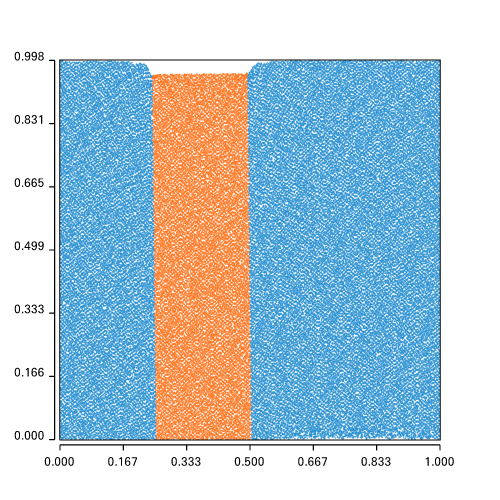

In [12]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_Dense.png")

Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/3288758610.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.28125, 0.971961) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/3288758610.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.34375, 0.971961) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/3288758610.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.40625, 0.971961) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/328875


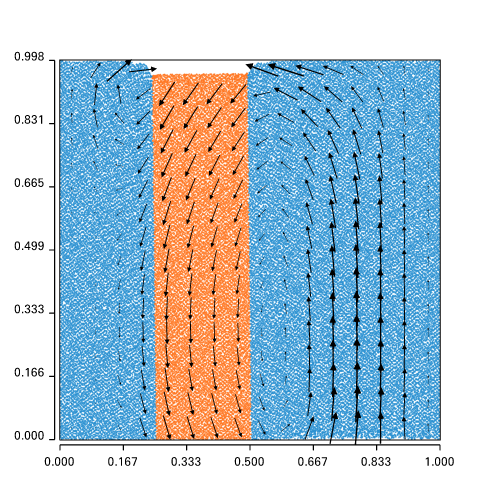

Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/3288758610.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.28125, 0.971961) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/3288758610.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.34375, 0.971961) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/3288758610.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.40625, 0.971961) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_4978/328875

In [13]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")

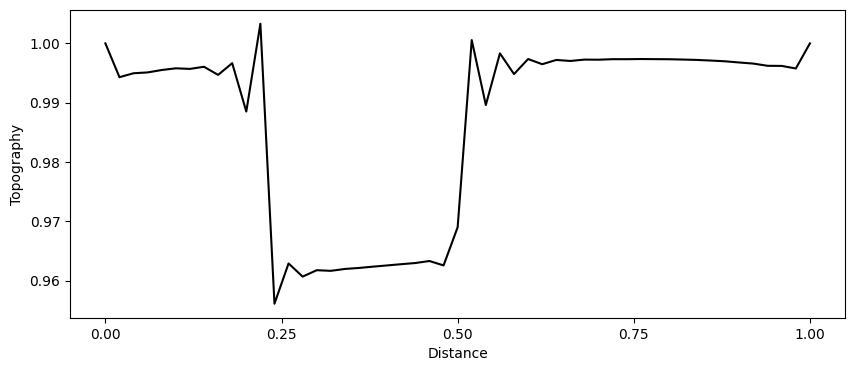

In [14]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [15]:
coords[:,1].mean()

0.98717144759157416

In [ ]:
1/1.05*0.25+0.75

In [ ]:
Model.velocityField.evaluate(Model.bottom_wall)